In [ ]:
import dask.dataframe as dd
from dask.distributed import Client
import numpy as np
import pandas as pd
import sys, os

# Khởi tạo Dask client để tối ưu hiệu suất
client = Client()

file_path = "remapping_dataset_2type.csv"
output_files = ["test.csv", "file1.csv", "file2.csv", "file3.csv"]
# Tỉ lệ chia (3:2:1)

# Cấu hình
chunksize = 100000  # Đọc từng phần (tuỳ vào RAM)
temp_dir = "FL_Dataset/"  # Thư mục lưu file tạm

output_files = [temp_dir + output_file for output_file in output_files]
print(output_files)

header_saved=False
for chunk in pd.read_csv(file_path, chunksize=chunksize):
    df_1 = chunk.sample(frac=0.2, random_state=42)
    df_rest = chunk.drop(df_1.index)
    df_2 = df_rest.sample(frac=1/4, random_state=42)
    df_rest1 = df_rest.drop(df_2.index)
    df_3 = df_rest1.sample(frac=0.5, random_state=42)
    df_4 = df_rest1.drop(df_3.index)

    df_1.to_csv(output_files[0], mode="a", header=not header_saved, index=False)
    df_2.to_csv(output_files[1], mode="a", header=not header_saved, index=False)
    df_3.to_csv(output_files[2], mode="a", header=not header_saved, index=False)
    df_4.to_csv(output_files[3], mode="a", header=not header_saved, index=False)
    header_saved = True

/home/th/miniconda3/envs/tf/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46485 instead
  warnings.warn(


['FL_Dataset/test.csv', 'FL_Dataset/file1.csv', 'FL_Dataset/file2.csv', 'FL_Dataset/file3.csv']


## Split parquet

In [7]:
import os
import dask.dataframe as dd
p_dir = [ "C:/Users/hoang/FileCSV_DACN_2025/parquet_shuffled_IoT23", "/mnt/c/Users/hoang/FileCSV_DACN_2025/parquet_shuffled_IoT23"]
s_dir = [ "C:/Users/hoang/FileCSV_DACN_2025/fl_IoT23/", "/mnt/c/Users/hoang/FileCSV_DACN_2025/fl_IoT23/"]
s_f = [f"file{index}.csv" for index in range(3)]

p_dir = dir[0] if os.name == 'nt' else p_dir[1]
s_dir = dir[0] if os.name == 'nt' else s_dir[1]

s_f = [s_dir+f for f in s_f]
print("FL Files: ", s_f)

if os.path.exists(s_dir) ==False:
    os.makedirs(s_dir)
    
df = dd.read_parquet(p_dir)
print("Partitions Number: ", df.npartitions)

header = True
for partition in df.partitions:
    partition = partition.compute()
    df1 = partition.sample(frac = 0.2, random_state=42)
    tempdf = partition.drop(df1.index)
    df2 = tempdf.sample(frac=0.375, random_state=42)
    df3 = tempdf.drop(df2.index)
    
    df1.to_csv(s_f[0], mode='a', index=False, header=header)
    df2.to_csv(s_f[1], mode='a', index=False, header=header)
    df3.to_csv(s_f[2], mode='a', index=False, header=header)
    header = False    

FL Files:  ['/mnt/c/Users/hoang/FileCSV_DACN_2025/fl_IoT23/file0.csv', '/mnt/c/Users/hoang/FileCSV_DACN_2025/fl_IoT23/file1.csv', '/mnt/c/Users/hoang/FileCSV_DACN_2025/fl_IoT23/file2.csv']
Partitions Number:  862


In [1]:
import os
import dask.dataframe as dd 
p_dir = [ "C:/Users/hoang/FileCSV_DACN_2025/parquet_shuffled_IoT23", "/mnt/c/Users/hoang/FileCSV_DACN_2025/parquet_shuffled_IoT23"]
s_dir = [ "C:/Users/hoang/FileCSV_DACN_2025/fl_IoT23/", "/mnt/c/Users/hoang/FileCSV_DACN_2025/fl_IoT23/"]

s_dir = s_dir[0] if os.name == 'nt' else s_dir[1]
s_f = [s_dir+f"file{index}.csv" for index in range(3)]
p_dir = [ s_dir+f"parquet_f{index}" for index in range(3)]
print(p_dir)

for index, f in enumerate(s_f):
    print("Processing file ", f)
    df = dd.read_csv(f, blocksize= "32MB")
    df.to_parquet(p_dir[index])

['C:/Users/hoang/FileCSV_DACN_2025/fl_IoT23/parquet_f0', 'C:/Users/hoang/FileCSV_DACN_2025/fl_IoT23/parquet_f1', 'C:/Users/hoang/FileCSV_DACN_2025/fl_IoT23/parquet_f2']
Processing file  C:/Users/hoang/FileCSV_DACN_2025/fl_IoT23/file0.csv
Processing file  C:/Users/hoang/FileCSV_DACN_2025/fl_IoT23/file1.csv
Processing file  C:/Users/hoang/FileCSV_DACN_2025/fl_IoT23/file2.csv


# Split Parquet  Non IID

In [4]:
import os
import dask.dataframe as dd
from sklearn.utils import shuffle
import pandas as pd

p_dir = [ "C:/Users/hoang/FileCSV_DACN_2025/parquet_shuffled_IoT23", "/mnt/c/Users/hoang/FileCSV_DACN_2025/parquet_shuffled_IoT23"]
s_dir = [ "C:/Users/hoang/FileCSV_DACN_2025/nonIID_fl_IoT23/", "/mnt/c/Users/hoang/FileCSV_DACN_2025/nonIID_fl_IoT23/"]
s_f = [f"file{index}.csv" for index in range(3)]

p_dir =p_dir[0] if os.name == 'nt' else p_dir[1]
s_dir = s_dir[0] if os.name == 'nt' else s_dir[1]

print(s_dir)
s_f = [s_dir+f for f in s_f]
print("FL Files: ", s_f)

if os.path.exists(s_dir) ==False:
    os.makedirs(s_dir)
    
df = dd.read_parquet(p_dir)
print("Partitions Number: ", df.npartitions)

header=True
for partition in df.partitions:
    partition = partition.compute()
    part_0 = partition[partition['detailed-label'] == 0]
    part_1 = partition[partition['detailed-label'] == 1]
    # Tỷ lệ trong mỗi part:
    
    df0 = part_0.sample(frac=0.3)
    part_0 = part_0.drop(df0.index)
    df1 = part_1.sample(frac=0.6)
    part_1= part_1.drop(df1.index)
    fl1 = pd.concat([df0,df1])
    del df0, df1
    
    df0 = part_0.sample(frac=0.75)
    df1 = part_1.sample(frac=0.45)
    part_0=part_0.drop(df0.index)
    part_1=part_1.drop(df1.index)
    fl2 = pd.concat([df0,df1])
    del df0, df1
    
    fl3 =pd.concat([part_0, part_1])

    fl1 = shuffle(fl1, random_state=10)
    fl2 = shuffle(fl2, random_state=6)
    fl3 = shuffle(fl3, random_state=4)
        
    fl1.to_csv(s_f[0], mode='a', index=False, header=header)
    fl2.to_csv(s_f[1], mode='a', index=False, header=header)
    fl3.to_csv(s_f[2], mode='a', index=False, header=header)
    header = False

C:/Users/hoang/FileCSV_DACN_2025/nonIID_fl_IoT23/
FL Files:  ['C:/Users/hoang/FileCSV_DACN_2025/nonIID_fl_IoT23/file0.csv', 'C:/Users/hoang/FileCSV_DACN_2025/nonIID_fl_IoT23/file1.csv', 'C:/Users/hoang/FileCSV_DACN_2025/nonIID_fl_IoT23/file2.csv']
Partitions Number:  862


In [5]:
import os
import dask.dataframe as dd 
s_dir = [ "C:/Users/hoang/FileCSV_DACN_2025/nonIID_fl_IoT23/", "/mnt/c/Users/hoang/FileCSV_DACN_2025/nonIID_fl_IoT23/"]

s_dir = s_dir[0] if os.name == 'nt' else s_dir[1]
s_f = [s_dir+f"file{index}.csv" for index in range(3)]
p_dir = [ s_dir+f"parquet_f{index}" for index in range(3)]
print(p_dir)

for index, f in enumerate(s_f):
    print("Processing file ", f)
    df = dd.read_csv(f, blocksize= "16MB")
    df.to_parquet(p_dir[index])

['C:/Users/hoang/FileCSV_DACN_2025/nonIID_fl_IoT23/parquet_f0', 'C:/Users/hoang/FileCSV_DACN_2025/nonIID_fl_IoT23/parquet_f1', 'C:/Users/hoang/FileCSV_DACN_2025/nonIID_fl_IoT23/parquet_f2']
Processing file  C:/Users/hoang/FileCSV_DACN_2025/nonIID_fl_IoT23/file0.csv
Processing file  C:/Users/hoang/FileCSV_DACN_2025/nonIID_fl_IoT23/file1.csv
Processing file  C:/Users/hoang/FileCSV_DACN_2025/nonIID_fl_IoT23/file2.csv


0.33550830487131966
                   part1     part2     part3
detailed-label                              
0                6247015   8750899  13491221
1               12372539  17346163  26694849
0.33550830487131966
0.3353212327119428
0.33571884486340664
0.6644916951286803
0.6646787672880572
0.6642811551365934


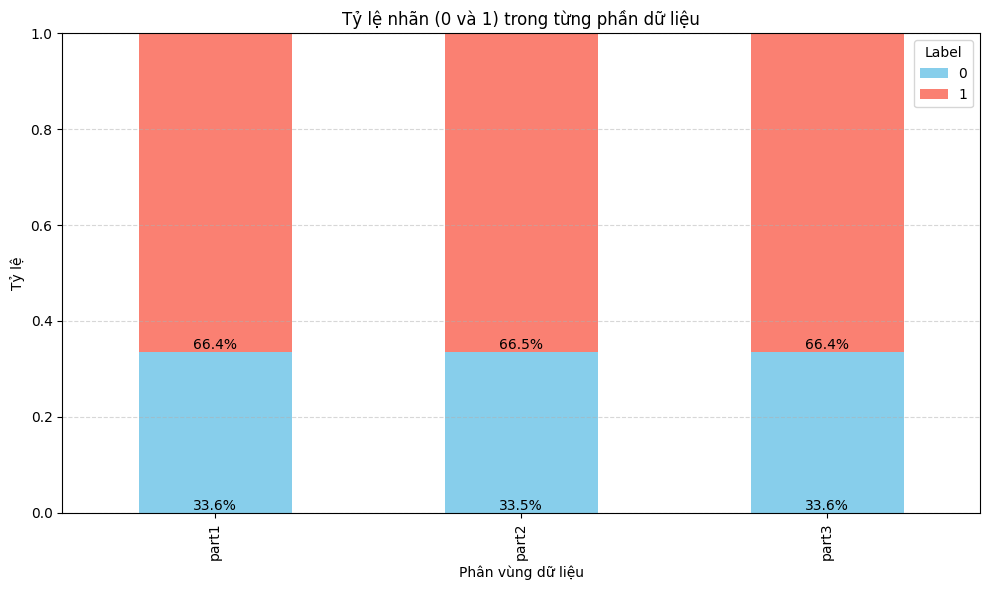

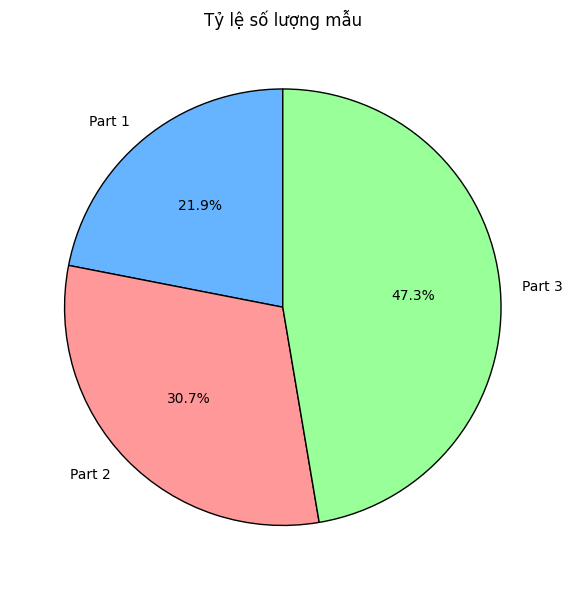

In [33]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import pandas as pd
import os

s_dir = [ "C:/Users/hoang/FileCSV_DACN_2025/fl_IoT23/", "/mnt/c/Users/hoang/FileCSV_DACN_2025/fl_IoT23/"]
s_dir = s_dir[0] if os.name == 'nt' else s_dir[1]
p_dir = [ s_dir+f"parquet_f{index}" for index in range(3)]

dfs = [dd.read_parquet(filePath) for  filePath in p_dir]

counts = {
    'part1': dfs[0]['detailed-label'].value_counts().compute(),
    'part2': dfs[1]['detailed-label'].value_counts().compute(),
    'part3': dfs[2]['detailed-label'].value_counts().compute(),
}

df_counts = pd.DataFrame(counts).fillna(0).astype(int)
df_ratios = df_counts.divide(df_counts.sum(), axis=1)

print(df_ratios.loc[0]['part1'])
print(df_counts)
# Vẽ stacked bar chart
ax = df_ratios.T.plot(
    kind='bar',
    stacked=True,
    color=['skyblue', 'salmon'],
    figsize=(10, 6)
)

for i in range(0,2):
    for j, part in enumerate(df_ratios.columns):
        value = df_ratios.loc[i][part]
        count = df_counts.loc[i][part]
        print(value)
        ax.text(
            x=j,
            y=df_ratios.T.iloc[j, :i].sum(),  # vị trí stack phía dưới
            s=f"{value*100:.1f}%",
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

# Trang trí biểu đồ
plt.title("Tỷ lệ nhãn (0 và 1) trong từng phần dữ liệu")
plt.xlabel("Phân vùng dữ liệu")
plt.ylabel("Tỷ lệ")
plt.legend(title='Label', labels=['0', '1'])
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Tính số lượng mẫu (số dòng) mỗi phần
sizes = [len(df) for df in dfs]


# Nhãn tương ứng
labels = ['Part 1', 'Part 2', 'Part 3']
colors = ['#66b3ff', '#ff9999', '#99ff99']

# Vẽ biểu đồ hình tròn
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Tỷ lệ số lượng mẫu")
plt.tight_layout()
plt.show()